<a href="https://colab.research.google.com/github/AlekseevaTatiana23/Python_Libraries_for_DS/blob/main/ht9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 9. Использование на практике методов снижения размерности

Использование алгоритмов понижения размерности для улучшения классификации новостей (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html)

Цель задания: Исследовать влияние различных методов понижения размерности на качество классификации текстовых данных.

Датасет: Набор данных новостных статей (датасет '20 Newsgroups' доступный в sklearn.datasets).

Задачи:

Загрузите датасет '20 Newsgroups' из sklearn.

Проведите предобработку данных (очистка текста, удаление стоп-слов, векторизация с использованием TF-IDF).

Примените к полученным векторам TF-IDF следующие методы понижения размерности: — PCA (Principal Component Analysis) — t-SNE (t-distributed Stochastic Neighbor Embedding) — UMAP (Uniform Manifold Approximation and Projection).

После понижения размерности данных используйте любой метод машинного обучения для классификации новостей по темам.

Сравните качество классификации для каждого метода понижения размерности. Используйте метрики точности и F1-меру.

Визуализируйте двумерное представление данных для каждого метода понижения размерности, чтобы оценить, как алгоритмы справляются с сепарацией классов.

Напишите отчёт, в котором обсудите, какой метод понижения размерности оказал наиболее значительное влияние на качество классификации и почему.

In [1]:
!pip install umap-learn[plot]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 100.8 MB/s eta 0:00:00


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd

In [3]:
newsgroups_data = fetch_20newsgroups(subset='all')
data = {
    'text': newsgroups_data.data,
    'target': newsgroups_data.target}
df = pd.DataFrame(data)
df['category'] = df['target'].apply(lambda x: newsgroups_data.target_names[x])
df

,text,target,category
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,rec.sport.hockey
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3,comp.sys.ibm.pc.hardware
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17,talk.politics.mideast
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3,comp.sys.ibm.pc.hardware
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4,comp.sys.mac.hardware
...,...,...,...
18841,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med
18842,From: rdell@cbnewsf.cb.att.com (richard.b.dell...,12,sci.electronics
18843,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware
18844,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics


In [4]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (18846, 3)
Пропущенные значения:
text        0
target      0
category    0
dtype: int64


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,18846.0,9.293166,5.562798,0.0,5.0,9.0,14.0,19.0


In [7]:
df['text'].apply(len).describe()

,text
count,18846.000000
mean,1902.525894
std,3984.970264
min,115.000000
25%,751.000000
50%,1175.000000
75%,1874.750000
max,160616.000000


In [8]:
import seaborn as sns

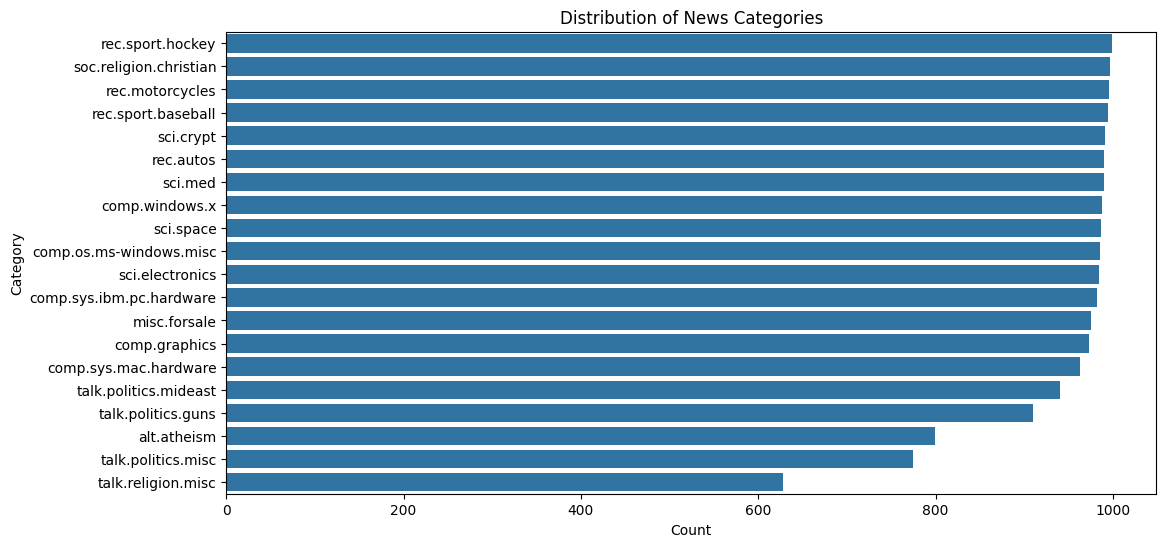

In [9]:
# Распределение классов
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

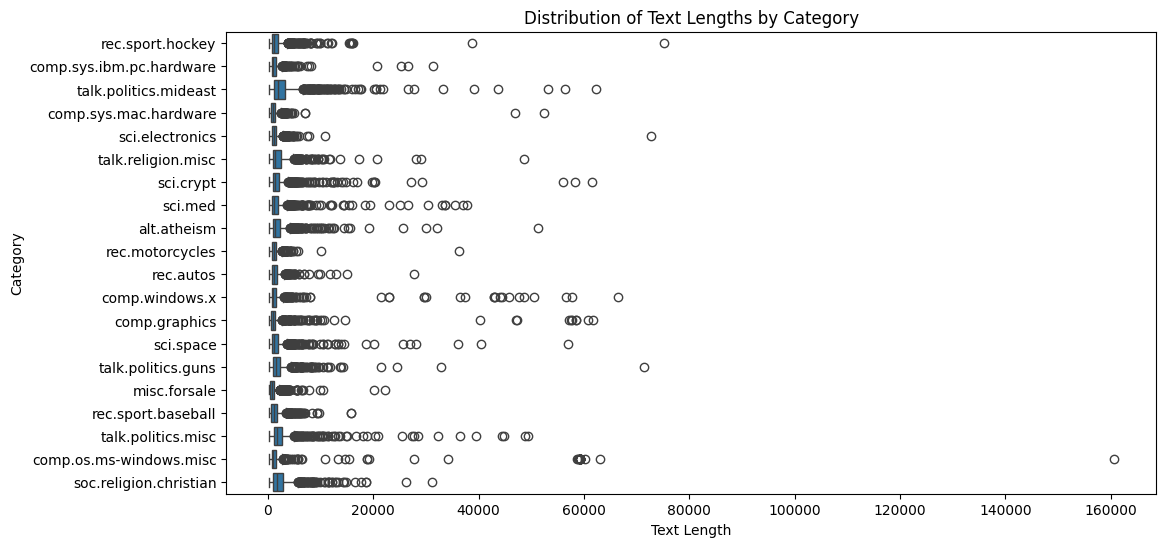

In [10]:
# Длина текстов в различных категориях
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(y='category', x='text_length', data=df, orient='h')
plt.title('Distribution of Text Lengths by Category')
plt.xlabel('Text Length')
plt.ylabel('Category')
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

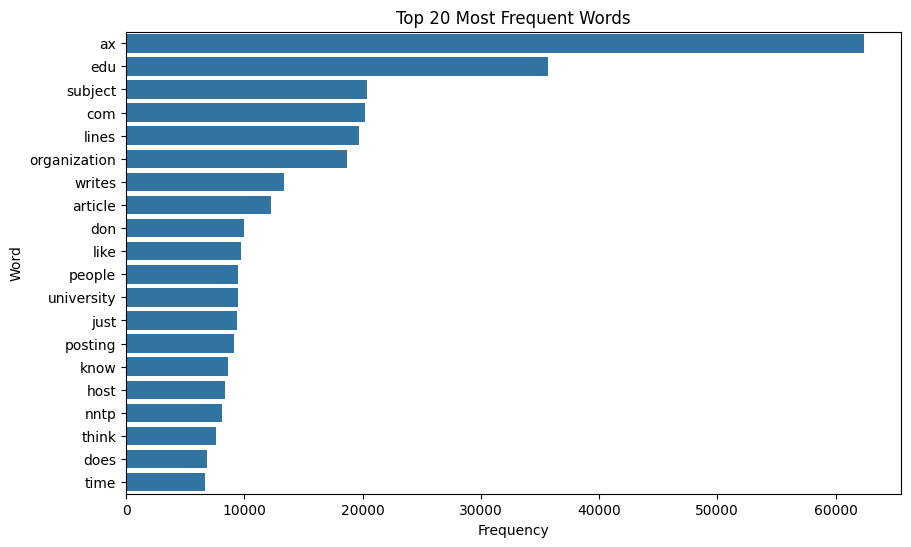

In [14]:
# Частотный анализ слов
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['text'])

# X.toarray(): Преобразует разреженную матрицу в плотный массив (numpy array), чтобы можно было легко суммировать частоты.
# sum(axis=0): Суммирует частоты слов по всем документам, создавая вектор частот,
# где каждая позиция соответствует суммарной частоте одного слова во всех документах.
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': X.toarray().sum(axis=0)
})

plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=word_freq.sort_values(by='frequency', ascending=False))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


Проведение предобработки данных

In [15]:
# remove=('headers', 'footers', 'quotes') - из текстов будут удалены заголовки, подписи и цитаты.
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Удаление стоп-слов
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in ENGLISH_STOP_WORDS]
    return ' '.join(words)
cleaned_texts = [remove_stopwords(text) for text in newsgroups_data.data]

# Преобразование очищенного текста в TF-IDF признаки (будут выбраны только 5к наиболее значимых токенов)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5_000)
tfidf_features = tfidf_vectorizer.fit_transform(cleaned_texts)

# Преобразование числовых меток категорий в строковые названия категорий
category_labels = [newsgroups_data.target_names[i] for i in newsgroups_data.target]

Применение методов пониженной размерности

In [21]:
#PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(tfidf_features.toarray())

In [22]:
# Сколько информации сохранено в первых двух компонентах PCA
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print(f'PCA - Total Explained Variance (information retained): {total_explained_variance:.2f}')

PCA - Total Explained Variance (information retained): 0.01


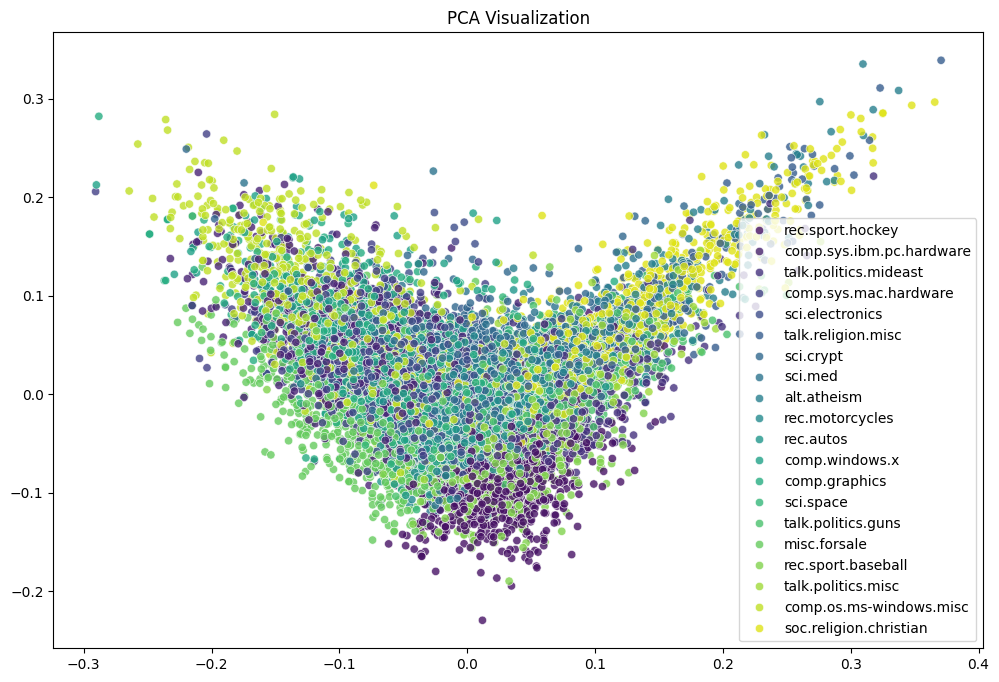

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=category_labels, palette='viridis', legend='full', alpha=0.8)
plt.title('PCA Visualization')
plt.show()

In [24]:
#t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_features.toarray())

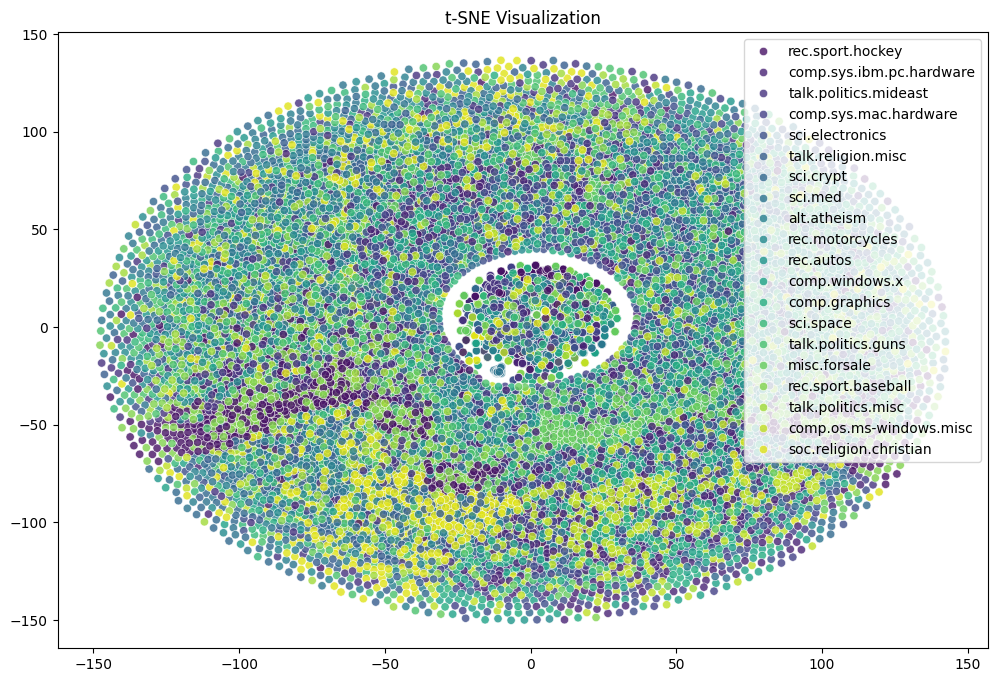

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=category_labels, palette='viridis', legend='full', alpha=0.8)
plt.title('t-SNE Visualization')
plt.show()

In [25]:
#UMAP
umap = UMAP(n_components=2, random_state=42)
umap_result = umap.fit_transform(tfidf_features.toarray())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


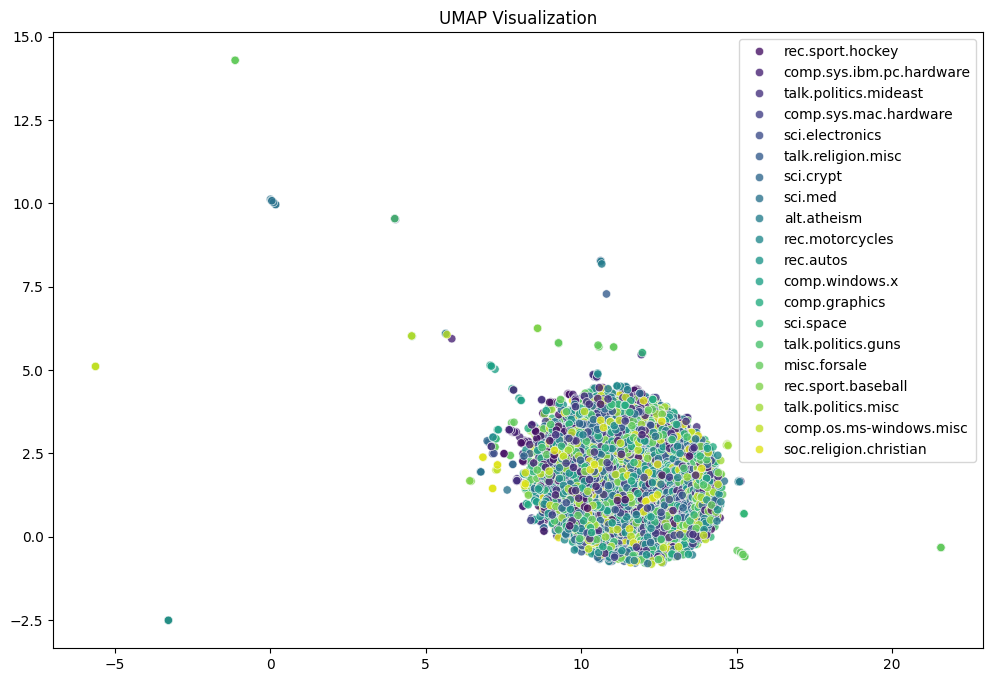

In [28]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=category_labels, palette='viridis', legend='full', alpha=0.8)
plt.title('UMAP Visualization')
plt.show()

Использование метода машинного обучения для классификации новостей по темам

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [29]:
#Метод опорных векторов (SVM)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, newsgroups_data.target, test_size=0.2, random_state=42)

# Train SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.55      0.51       151
           1       0.61      0.65      0.63       202
           2       0.66      0.62      0.63       195
           3       0.58      0.62      0.60       183
           4       0.76      0.61      0.68       205
           5       0.81      0.73      0.77       215
           6       0.75      0.70      0.73       193
           7       0.43      0.73      0.54       196
           8       0.61      0.64      0.63       168
           9       0.81      0.78      0.80       211
          10       0.95      0.81      0.87       198
          11       0.85      0.70      0.77       201
          12       0.54      0.61      0.57       202
          13       0.72      0.80      0.76       194
          14       0.68      0.71      0.70       189
          15       0.72      0.74      0.73       202
          16       0.68      0.68      0.68       188
          17       0.84    

In [30]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, newsgroups_data.target, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_result, newsgroups_data.target, test_size=0.2, random_state=42)
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(tsne_result, newsgroups_data.target, test_size=0.2, random_state=42)
X_train_umap, X_test_umap, y_train_umap, y_test_umap = train_test_split(umap_result, newsgroups_data.target, test_size=0.2, random_state=42)

# Получение размеров данных
def get_shape(X):
    if hasattr(X, 'shape'):
        return X.shape[0]  # Размер первой размерности (количество примеров)
    else:
        return len(X)  # Для плотных матриц

In [31]:
# Функция для обучения модели и оценки метрик
def evaluate_model(X_train, X_test, y_train, y_test):
    #classifier = LogisticRegression(max_iter=1000, random_state=42)
    classifier = SVC(kernel='linear')

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    #average='weighted' - взвешенное среднее
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, f1

In [ ]:
accuracy, f1 = evaluate_model(X_train, X_test, y_train, y_test)
accuracy_pca, f1_pca = evaluate_model(X_train_pca, X_test_pca, y_train_pca, y_test_pca)
accuracy_tsne, f1_tsne = evaluate_model(X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne)
accuracy_umap, f1_umap = evaluate_model(X_train_umap, X_test_umap, y_train_umap, y_test_umap)

print(f'Без понижения размерности - Accuracy: {accuracy:.2f}, F1-score: {f1:.2f}')
print(f'PCA - Accuracy: {accuracy_pca:.2f}, F1-score: {f1_pca:.2f}')
print(f't-SNE - Accuracy: {accuracy_tsne:.2f}, F1-score: {f1_tsne:.2f}')
print(f'UMAP - Accuracy: {accuracy_umap:.2f}, F1-score: {f1_umap:.2f}')

Анализ:

- **Без понижения размерности:**  
  Accuracy и F1-score равны 0.67 — это довольно хороший результат, что говорит о том, что модель хорошо справляется с исходными данными.

- **PCA:**  
  Значения резко снизились (Accuracy: 0.21, F1: 0.16). Это может указывать на то, что PCA не сохранил достаточно информации для хорошей классификации, или параметры PCA требуют настройки.

- **t-SNE и UMAP:**  
  Результаты еще хуже (Accuracy: 0.09 и 0.06; F1: 0.05 и 0.02). Обычно t-SNE и UMAP используют для визуализации и могут не сохранять информацию, пригодную для классификации, особенно при сильном снижении размерности.

**Вывод:**  
- Понижение размерности ухудшает качество модели.  
- Возможно, параметры методов уменьшения размерности стоит доработать или использовать их только для визуализации, а не для обучения классификатора.  
- Результаты ясно показывают, что методы уменьшения размерности, в частности метод главных компонент, t-SNE и UMAP, не так эффективны, как использование полного набора признаков TF-IDF для классификации новостных статей из набора данных «20 групп новостей».

